# Python Implementation Visit.


For More Documentation

--> https://scikit-learn.org/stable/index.html

# Problem Statement


Based on the Pima Indians Hospital diabetes data , build Machine Learning binary classification model to predict if the person diabetic or Not based on below 



# Features. 

Pregnancies 


Glucose 



BloodPressure 



SkinThinckness



Insulin




BMI




Diabetespedigreefunction





Age


# Label



Outcome

In [5]:
#If you get some error please install this 
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.2 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 18.2 MB/s eta 0:00:00


In [6]:
#Lets Start with importing necessary Libraries 


import pandas as pd
import numpy as np


#For Data Visualization


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# For Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix ,roc_auc_score

In [7]:
data=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data .Great , let see the distribution of data.

# Data Preprocessing (Analysis(EDA))


EDA - Exploratory Data Analysis  - > Through Only

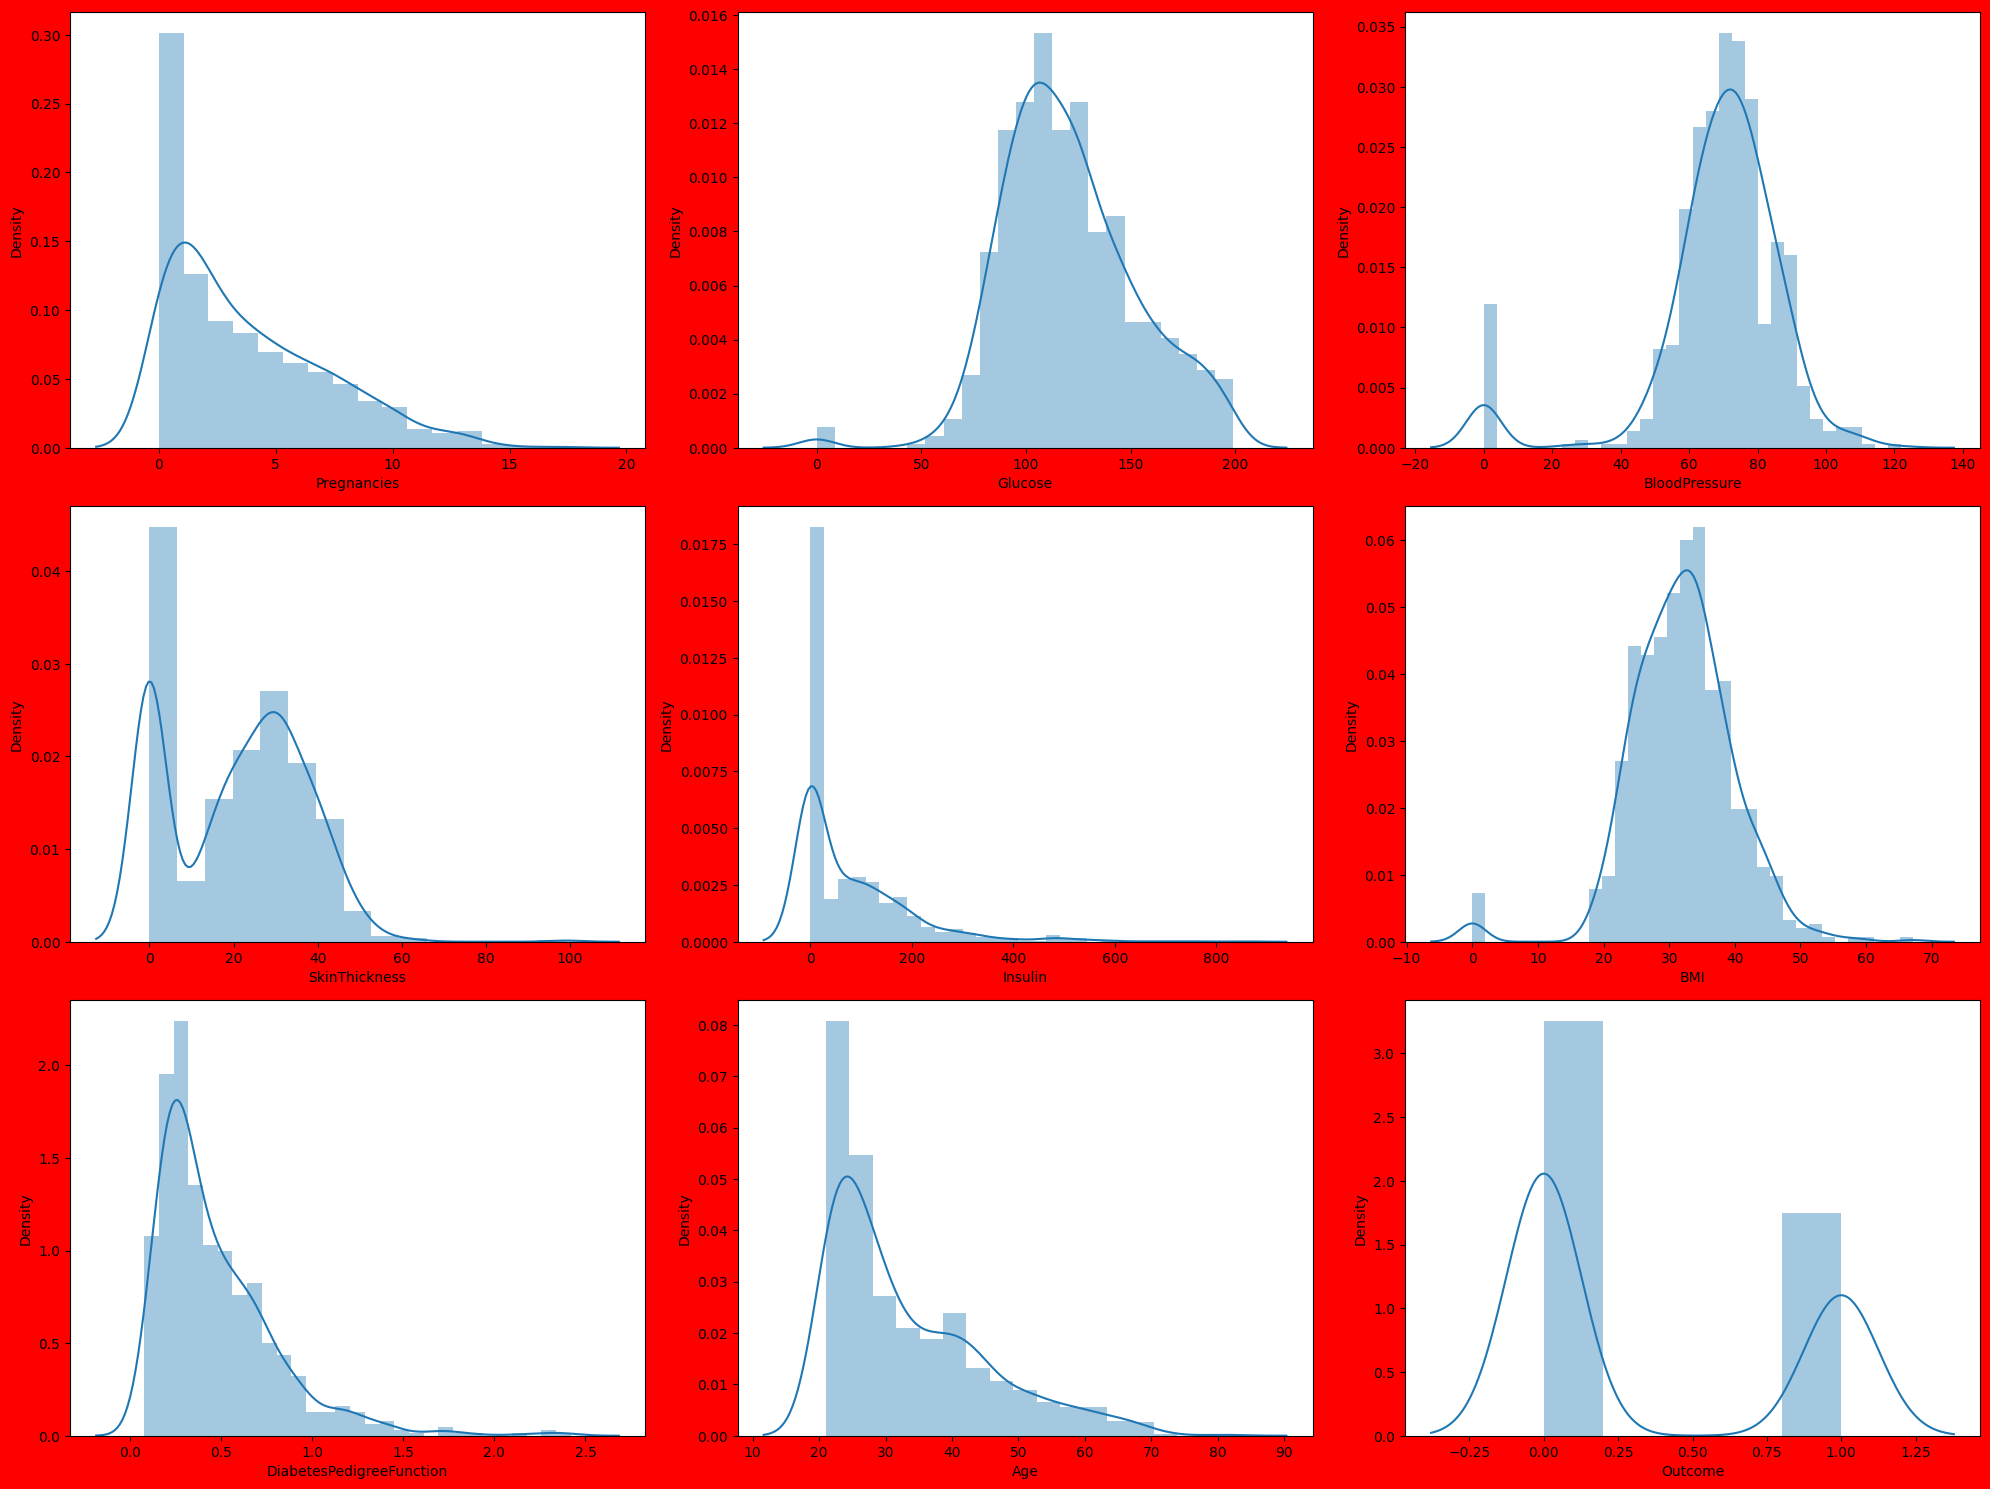

In [11]:
#Lets see how data is distributed for every column.
plt.figure(figsize=(20,15),facecolor='red')
graph=1
for column in data:
    if graph <=9:
        ax=plt.subplot(3,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column)
    graph +=1
plt.tight_layout()

We , can see there is some skewness in the data , lets deal with data.




Also we can see there few data for columns Glucose , insulin , skin thickness , BMI and Blood Pressure which have value as 0. That not possible you can do a quick search to see that one cannot have 0 values for these Lets deal with that we can either remove such data or simply replace it with their respective mean values , Lets do the latter

In [12]:
#replacing zero values with the mean of the column 
#i am going to use low risk method its mean method 
#treating zeros


data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [13]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

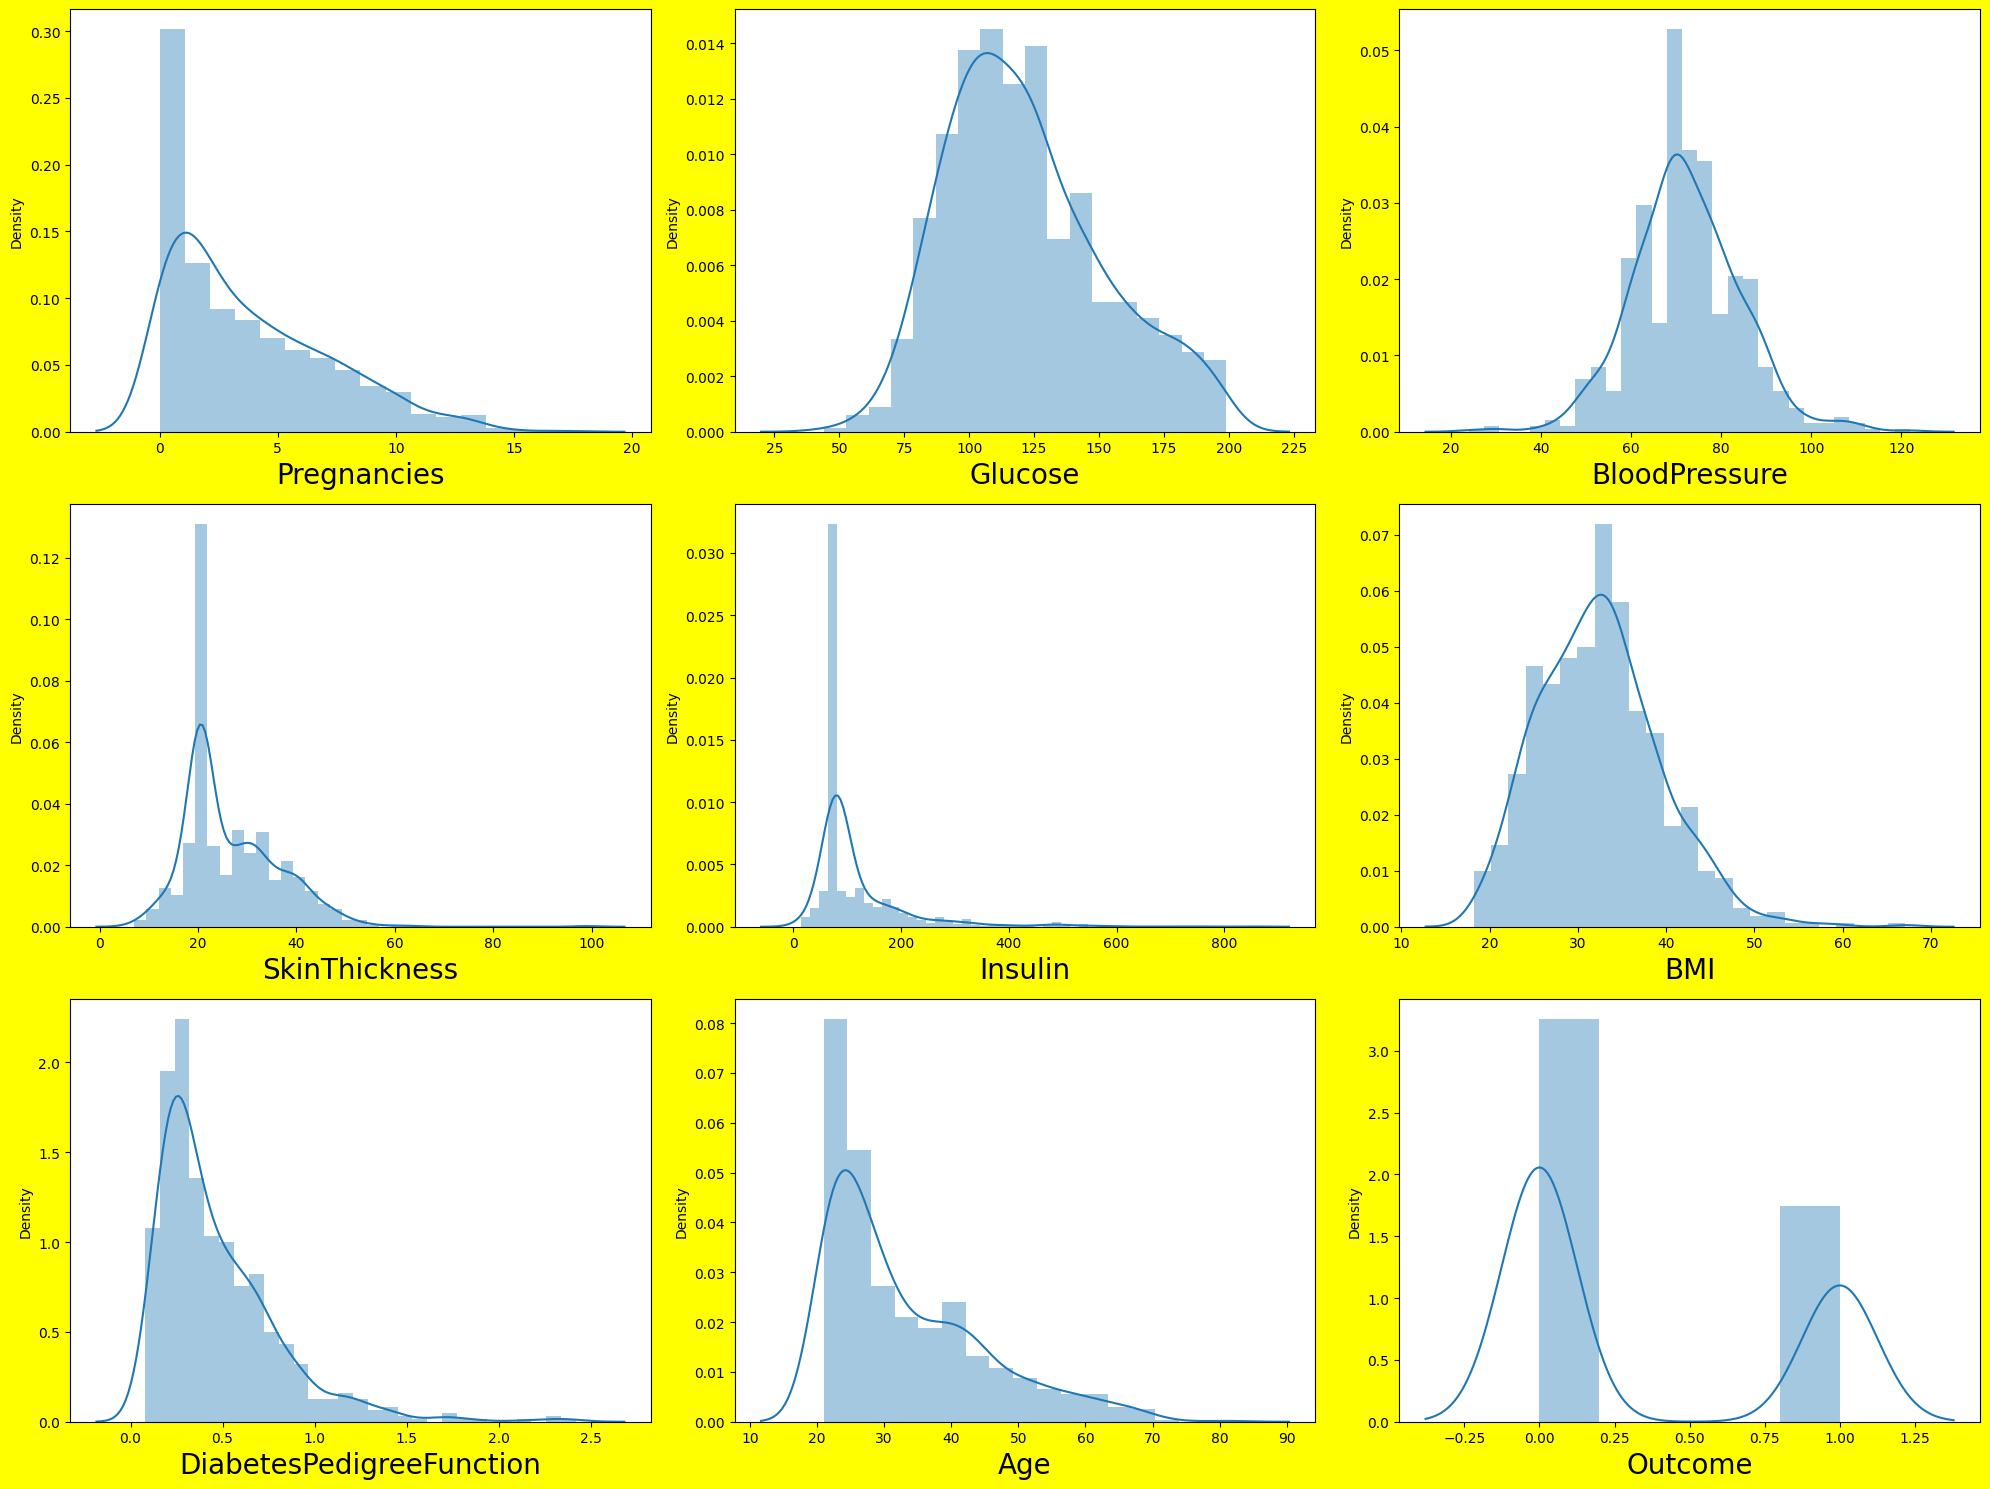

In [14]:
#Lets see how data is distributed for every column
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()
        

Now we have deal with the 0 values and looks better , But there still are outliers present in some column . Lets deal with them.


In [15]:
df_feature=data.drop('Outcome',axis=1)

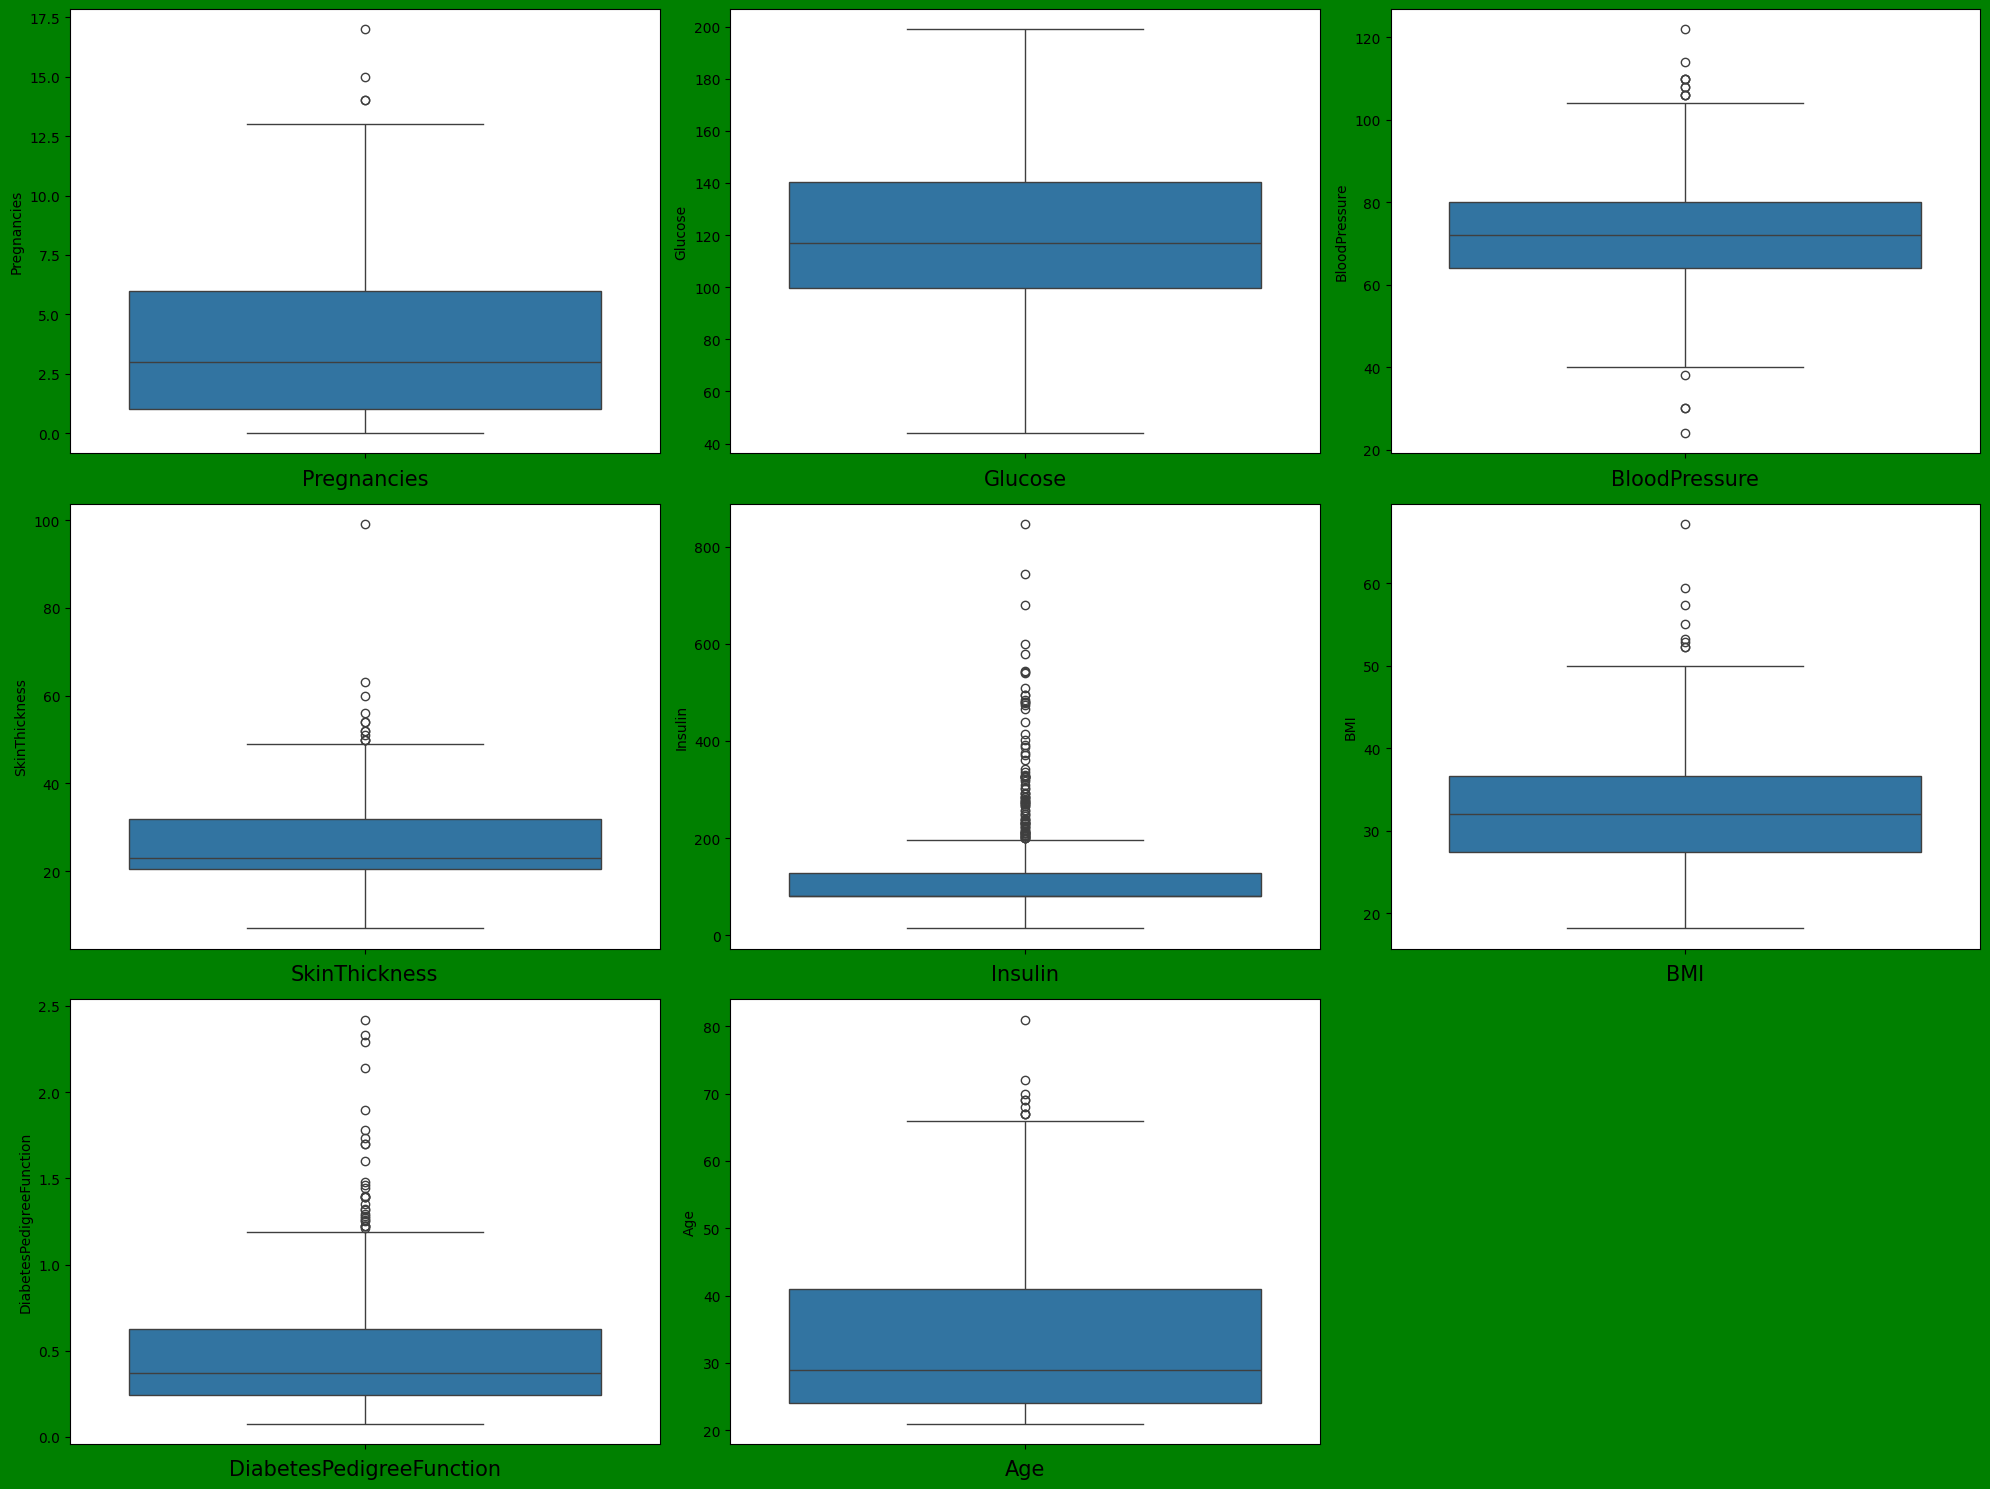

In [16]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15),facecolor='green')
plotnumber=1
for column in df_feature:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()
        

In [17]:
data.shape

(768, 9)

In [18]:
#Find the IQR (inter quantile range) to identify

In [19]:
#1st quantile 
q1=data.quantile(0.25)

In [20]:
#3rd quantile
q3=data.quantile(0.75)

In [21]:
#IQR 
IQR =q3  - q1

# OutLiers Detection Formula

# Higher side ==> Q3 +(1.5 * IQR)


# Lower Side == > Q1 -(1.5 * IQR)

In [22]:
print(q1)
print(q3)
print(IQR)

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64
Pregnancies                  5.000000
Glucose                     40.500000
BloodPressure               16.000000
SkinThickness               11.463542
Insulin                     47.450521
BMI                          9.100000
DiabetesPedigreeFunction     0.382

In [23]:
#Validating one Outlier 
pred_high = (q3.Pregnancies + (1.5 * IQR.Pregnancies))
pred_high

13.5

In [24]:
#Check the indexes which have higher values
index=np.where(data['Pregnancies']>pred_high)
index

(array([ 88, 159, 298, 455]),)

In [25]:
data=data.drop(data.index[index])

In [26]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [27]:
bp_high =(q3.BloodPressure + (1.5 * IQR.BloodPressure))
print(bp_high)
index=np.where(data['BloodPressure']>bp_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [28]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687]),)

In [29]:
st_high=(q3.SkinThickness + (1.5 * IQR.SkinThickness))
print(st_high)


index=np.where(data['SkinThickness']>st_high)


data=data.drop(data.index[index])


print(data.shape)


data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [30]:
insu_high=(q3.Insulin + (1.5 * IQR.Insulin))
print(insu_high)


index=np.where(data['Insulin']>insu_high)


data=data.drop(data.index[index])
print(data.shape)


data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [31]:
bmi_high=(q3.BMI + (1.5 * IQR.BMI))
print(bmi_high)


index=np.where(data['BMI']>bmi_high)


data=data.drop(data.index[index])
print(data.shape)



data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [32]:
dpf_high=(q3.DiabetesPedigreeFunction + (1.5 *IQR.DiabetesPedigreeFunction))
print(dpf_high)


index=np.where(data['DiabetesPedigreeFunction']>dpf_high)


data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [33]:
age_high = (q3.Age + (1.5*IQR.Age))
print(age_high)


index=np.where(data['Age']>age_high)


data=data.drop(data.index[index])
print(data.shape)


data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [34]:
bp_low=(q1.BloodPressure - (1.5 * IQR.BloodPressure))
print(bp_low)

index=np.where(data['BloodPressure']<bp_low)



data=data.drop(data.index[index])


print(data.shape)


data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


So, Now we have taken care , outliers , on by one we are fixing , zero and outliers this time visualize with distplot after deleting the outliers. 

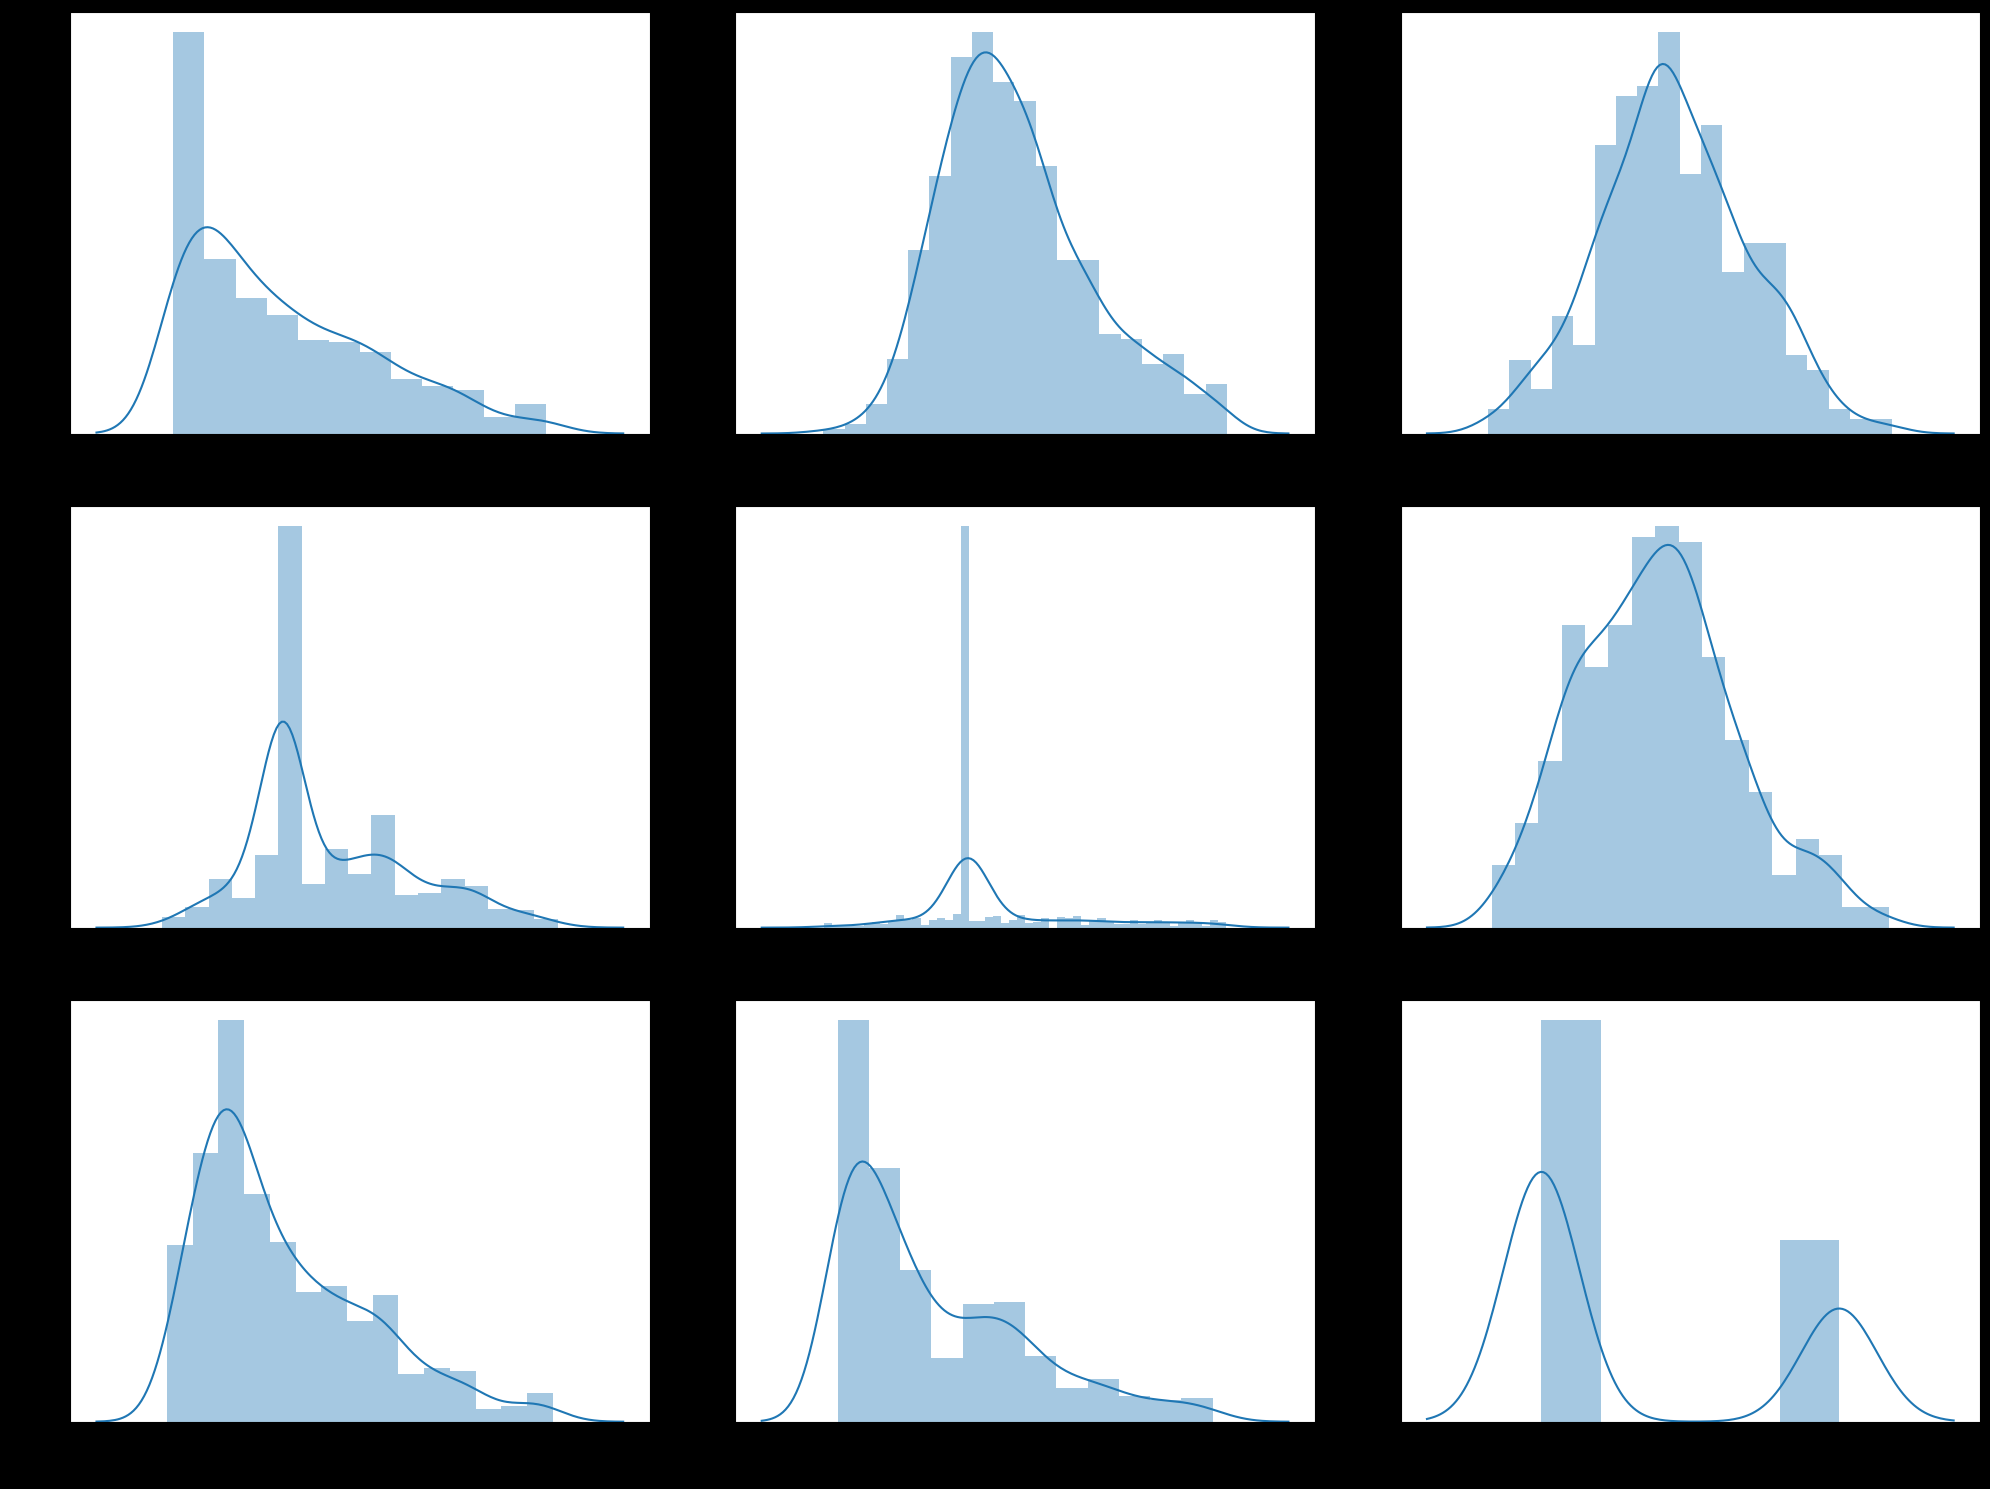

In [35]:
plt.figure(figsize=(20,15),facecolor='Black')
plotnumber = 1
for column in data :
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

That data looks much better now than before we will start por analysis with this data now as we dont want to lose important information . if our model doesn't work with accuracy we will comeback for more preprocessing.

#  Quickly recap what we did.

1 - First observed there is no null values .



2 - And , Observation we made mean,std. where not in sink , or some of the features



3 - We , try to check the displot and we figure out zeros and outliers or skewed data.


4 - For then sure what we did first we fixed 0 data with mean then we plotted a Boxplot to make sure there is a outliers



5 - After that we have use quantile techniques and removed outliers 




6 - After that we just again plotted a displot to make sure everything looks fine 




# This are steps we are taken care.




#  Finding Relationship . We want to keep only those features which have relationship with label.

In [36]:
x=data.drop(columns=['Outcome'])

y=data.Outcome

Before we fit our data to a model lets Visualize the relationship between out independent variables and the categories

Categorical data plotting , when we are plotting stripplot first we have to write label then feature . 

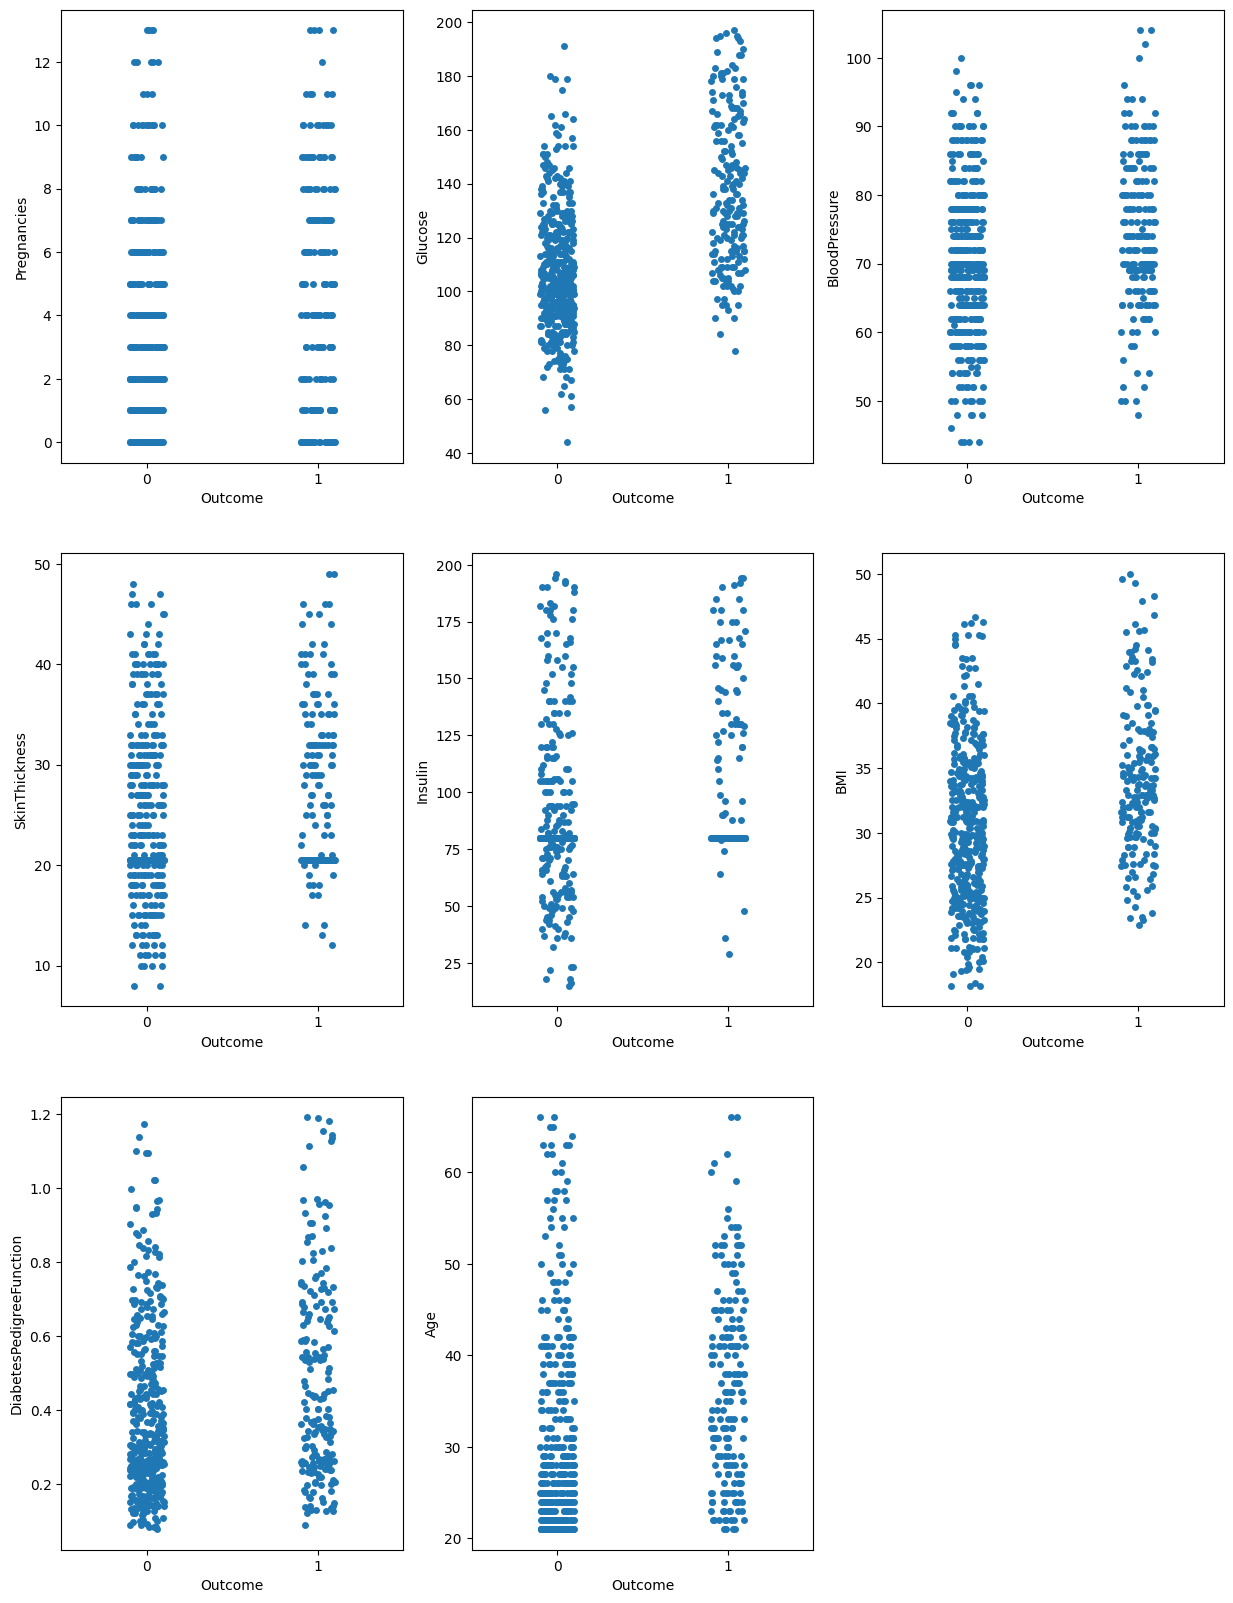

In [43]:
#Lets see how feature are related to class
plt.figure(figsize=(15,20))
plotnumber = 1
for column in x:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column])
    plotnumber +=1
plt.show()

Great !!! Let Proceed by cheacking multicollinearity in the dependent variables . Before that , we shoul scale our data . Let Use the Standard Scaler for that ,

#  Check MultiCollinearity Problem . Find if one feature  is dependent or another feature .




Multicollinearity Problem  - It waste our time and cost (Its a Preprocessing Step ) 

There is an chance as as when you add more and more feature , unrelevant features or features vs features relation if it has . so model might be overfitted model there is a possibility and i am not saying 100% but there is a chance . so far those reason i need to check relationship between feature vs feature and technically in machine learning world we called it as multicollinearity Problem.

# Q 1- So , How do i find out if there is a MultiCollinearity Problem .

# Ans - Thats why VIF (Variance inflation Factor), its a stats model.

#  Q2 -How do you eliminate Multicollinearity Problem ?


# ANS - There are various ways 1 of the way is Variance inflation Factor , What are the other we learning in upcoming model.

In [44]:
#Now use standard scaler and standardized the data

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

This is how our data looks now after scaling . Great , now we will check for multicollinearty usinf VIF ( Variance Inflation Factor)

In [45]:
x_scaled.shape

(619, 8)

In [46]:
#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1-R2))

In [47]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [48]:
#Lets Check the Values 

vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


All the VIF are less then 5 and are very low. That means no multicollinearity . Now , we can go ahead with fitting our data to the model before that , lets split our data in test and training.




If VIF Score is greater than 5 then we can say assume , we cannot conclude we only assume there is multicollinearity problem exist.


Some project contain different VIF if depends upon the dataset.


5 is the standard number . more people follow.



So some time you will get  get 15,20 , also that we may not use VIF . we will use some ohter technique . we will learn in other algorithims.

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [50]:
log_reg=LogisticRegression()

In [51]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [52]:
#Lets see how our model performs on the test data set.

In [53]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0])

In [54]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [55]:
model to use.